In [261]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="whitegrid")
import random

from sklearn.preprocessing import scale
from sklearn.utils import shuffle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
LABELS = ["Normal", "Fraud"]



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [262]:
file_path = r'/Users/joelsabiti/Desktop/practicals/cereals/ainea.xlsx'

df = pd.read_excel(file_path)

In [212]:
df.columns.value_counts()

Residence                          1
Bleeding_History                   1
Circumcised_Partner                1
Smoking                            1
Multiple_Sex_Partners              1
Age_At_First_Sexual_Intercourse    1
Use_of_IUDs                        1
History_Of_STIs                    1
Family_History_Of_Ca               1
Marital_Status                     1
Bloody_Vaginal_Discharge           1
STI_Status                         1
HIV_Status                         1
Education                          1
Age                                1
Occupation                         1
HPV_STATUS                         1
Name: count, dtype: int64

In [213]:
df.Residence.value_counts()

Residence
hima              65
kidodo            60
nyakasanga        49
salut             38
Town Center       33
                  ..
kizungu/delta      1
katandoba          1
katebwa            1
kivengenya         1
moya               1
Name: count, Length: 207, dtype: int64

In [214]:
df=df.drop('Residence',axis=1)

In [215]:
status={
    'single ': 'single',
    'sinle ': 'single',
    'married ':'married', 
    'marrid ':'married',
    'maried ':'married', 
    'maried  ':'married',
    'marrried ':'married',
    'mmaried ':'married',
    'sperated ':'divorced',
    'seperated ':'divorced',
    'divorced ':'divorced',
    'divoced ' :'divorced', 
    'divocred ':'divorced', 
    'dovorced':'divorced',
    'window ':'widowed',
    'widow ':'widowed',
    'window':'widowed',
    
}

In [216]:
df['Marital_Status']=df['Marital_Status'].replace(status)

In [217]:
df['Marital_Status'].value_counts()

Marital_Status
married     543
single      363
divorced     16
widowed       7
Name: count, dtype: int64

In [218]:
marital_map = {
    'single':1,
    'married':2,
    'widowed':1,
    'divorced':1,
}
df['Marital_Status']=df['Marital_Status'].map(marital_map)
df['Marital_Status'].value_counts()

Marital_Status
2    543
1    386
Name: count, dtype: int64

In [219]:
df['Occupation'].unique()

array(['None ', 'Employed ', nan], dtype=object)

In [220]:
occupation_status={
    'Employed ':'Employed',
    'None':'Unemployed',
    'None ':'Unemployed',
}
df['Occupation']=df['Occupation'].replace(occupation_status)

In [221]:
occupation_map = {
    'Employed':1,
    'Unemployed':0,
}
df['Occupation']=df['Occupation'].map(occupation_map)

array([ 0.,  1., nan])

In [222]:
df['Occupation'].value_counts()

Occupation
0.0    670
1.0    203
Name: count, dtype: int64

In [223]:
df.drop('Education', axis=1, inplace=True)

In [224]:
df['HIV_Status'].value_counts()

HIV_Status
POS    627
NEG    283
ND      19
Name: count, dtype: int64

In [225]:
hiv_map = {
   'NEG':1,
    'POS':2,
    'ND':1,
}

df['HIV_Status']=df['HIV_Status'].map(hiv_map)
df['HIV_Status'].unique()

array([1, 2])

In [226]:
df['Bloody_Vaginal_Discharge'].unique()

array(['No', 'yes ', 'Yes '], dtype=object)

In [227]:
discharge_map = {
    'No':0,
    'yes ':1,
    'Yes ':1,
}

df['Bloody_Vaginal_Discharge']=df['Bloody_Vaginal_Discharge'].map(discharge_map)

In [228]:
df['Bloody_Vaginal_Discharge'].unique()

array([0, 1])

In [229]:
df['STI_Status'].unique()

array(['no ', 'no', 'yes', 'No', 'YES', 'NO', 'yes ', 'NO ', 'Yes', 'np',
       'n o', 'YES '], dtype=object)

In [230]:
STI_STATUS={
    'No':0,
    'no':0,
    'n o':0,
    'NO ':0,
    'YES':1,
    'no ':0,
    'NO':0,
    'Yes':1,
    'np':0,
    'yes':1,
    'yes ':1,
    'YES ':1,   
}

In [231]:
df['STI_Status']=df['STI_Status'].map(STI_STATUS)

In [232]:
df['STI_Status'].value_counts()

STI_Status
0    764
1    165
Name: count, dtype: int64

In [233]:
df['Family_History_Of_Ca'].unique()

array(['NO', 'yes', 'YES', 'ND', 'NO ', 'Yes'], dtype=object)

In [234]:
history ={
   'yes':1,
    'NO':0,
    'NO ':0,
    'Yes':1,
    'YES':1,
    'ND':0,
}

In [235]:
df['Family_History_Of_Ca'].value_counts()


Family_History_Of_Ca
NO     699
YES    190
yes     34
ND       2
NO       2
Yes      2
Name: count, dtype: int64

In [236]:
df['Family_History_Of_Ca']=df['Family_History_Of_Ca'].map(history)

In [237]:
df['Family_History_Of_Ca'].value_counts()

Family_History_Of_Ca
0    703
1    226
Name: count, dtype: int64

In [239]:
df['Bleeding_History'].value_counts()

Bleeding_History
No      736
yes     192
Yes       1
Name: count, dtype: int64

In [240]:
history2={
    'No':0,
    'yes ':1,
    'Yes ':1,
}
df['Bleeding_History']=df['Bleeding_History'].map(history2)
df['Bleeding_History'].value_counts()

Bleeding_History
0    736
1    193
Name: count, dtype: int64

In [242]:
df['History_Of_STIs'].value_counts()

History_Of_STIs
no      358
No      326
yes     161
Yes      68
NO       12
 No       2
YES       2
Name: count, dtype: int64

In [244]:
history3={
    'Yes ':1,
    ' No ':0,
    'no ':0,
    'NO ':0,
    'yes ':1,
    'YES ':1,
    'No':0,
}
df['History_Of_STIs']=df['History_Of_STIs'].map(history3)
df['History_Of_STIs'].value_counts()

Series([], Name: count, dtype: int64)

In [245]:
df['Use_of_IUDs'].value_counts()

Use_of_IUDs
no      558
yes     221
no       81
yes      42
NO        9
NO        7
YES       4
No        2
YES       2
n         2
np        1
Name: count, dtype: int64

In [246]:
history4={
    'yes':1,
    'No':0,
    'no ':0,
    'no':0,
    'NO':0,
    'YES':0,
    'NO ':0,
    'n':0,
    'yes ':1,
    'YES ':1,
    'np':0,
}
df['Use_of_IUDs']=df['Use_of_IUDs'].map(history4)
df['Use_of_IUDs'].unique()

array([0, 1])

In [247]:
df['Age_At_First_Sexual_Intercourse'].unique()

array([ 24,  22,  16,  18,  17,  15,  19,  21, 117,  20,  14,  23,  13,
        26])

In [248]:
age = {
       117:17
}
df['Age_At_First_Sexual_Intercourse']=df['Age_At_First_Sexual_Intercourse'].replace(age)

In [249]:
df['Age_At_First_Sexual_Intercourse'].unique()

array([24, 22, 16, 18, 17, 15, 19, 21, 20, 14, 23, 13, 26])

In [250]:
df['HPV_STATUS'].unique()

array(['NEG', 'NR', 'POS', 'NEG ', 'ND ', 'pos', 'ND', 'POS '],
      dtype=object)

In [251]:
cancer={
   'NEG':0,
    'NR':1,
    'ND':1,
    'ND ':1,
    'POS':1,
    'NEG ':0,
    'pos':1,
    'POS ':1,
}
df['HPV_STATUS']=df['HPV_STATUS'].replace(cancer)
df['HPV_STATUS'].unique()

array([0, 1])

In [252]:
count=df['HPV_STATUS'].value_counts()
print(count)

HPV_STATUS
0    840
1     89
Name: count, dtype: int64


In [253]:
count=df['Circumcised_Partner'].value_counts()
print(count)

Circumcised_Partner
Yes    850
NO      79
Name: count, dtype: int64


In [254]:
circumcised = {
    'Yes':1,
    'NO':0,    
}
df['Circumcised_Partner']=df['Circumcised_Partner'].map(circumcised)
df['Circumcised_Partner'].unique()

array([1, 0])

In [255]:
count=df['Smoking'].value_counts()
print(count)

Smoking
Smokes    85
Name: count, dtype: int64


In [256]:
smoking = {
    'None':0,
    'Smokes':1,    
}
df['Smoking']=df['Smoking'].map(smoking)
df['Smoking'].unique()

array([nan,  1.])

In [257]:
df['Smoking'].value_counts()

Smoking
1.0    85
Name: count, dtype: int64

In [47]:
 count=df['Multiple_Sex_Partners'].value_counts()
print(count) 

Multiple_Sex_Partners
NO     698
YES    225
Name: count, dtype: int64


In [48]:
partners = {
    'NO':0,
    'YES':1,    
}
df['Multiple_Sex_Partners']=df['Multiple_Sex_Partners'].map(partners)
df['Multiple_Sex_Partners'].unique()

array([0, 1])

In [49]:
df['Bloody_Vaginal_Discharge'].unique()

array([0, 1])

Shapiro-Wilk Test:
Statistic: 0.9820540547370911
p-value: 3.141987336974239e-09
Is the data normally distributed (p-value < alpha)? False

D'Agostino and Pearson's Test:
Statistic: 17.96269832383553
p-value: 0.00012573309870953406
Is the data normally distributed (p-value < alpha)? False


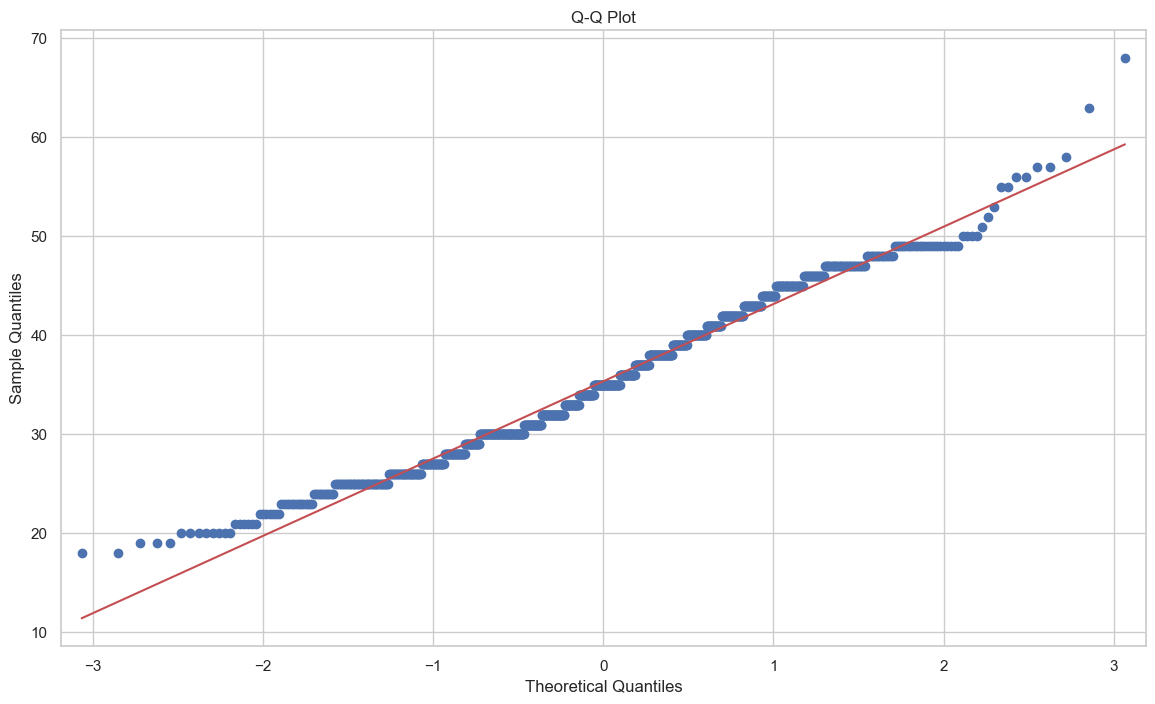

In [50]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

statistic, p_value = stats.shapiro(df['Age'])
alpha = 0.05
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)


k2, p_value = stats.normaltest(df['Age'])
print("\nD'Agostino and Pearson's Test:")
print("Statistic:", k2)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)

sm.qqplot(df['Age'], line='s')
plt.title("Q-Q Plot")
plt.show()


In [51]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(df['Age'], df['HPV_STATUS'], alternative='two-sided')
alpha = 0.05
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Are the distributions significantly different (p-value < alpha)?", p_value < alpha)

Mann-Whitney U Test:
Statistic: 851929.0
p-value: 0.0
Are the distributions significantly different (p-value < alpha)? True


Meaning the data is not normaly distributed and that age is statistically significant to HPV

Shapiro-Wilk Test:
Statistic: 0.951757550239563
p-value: 7.929718634891827e-17
Is the data normally distributed (p-value < alpha)? False

D'Agostino and Pearson's Test:
Statistic: 50.5004598820929
p-value: 1.0813454814278793e-11
Is the data normally distributed (p-value < alpha)? False


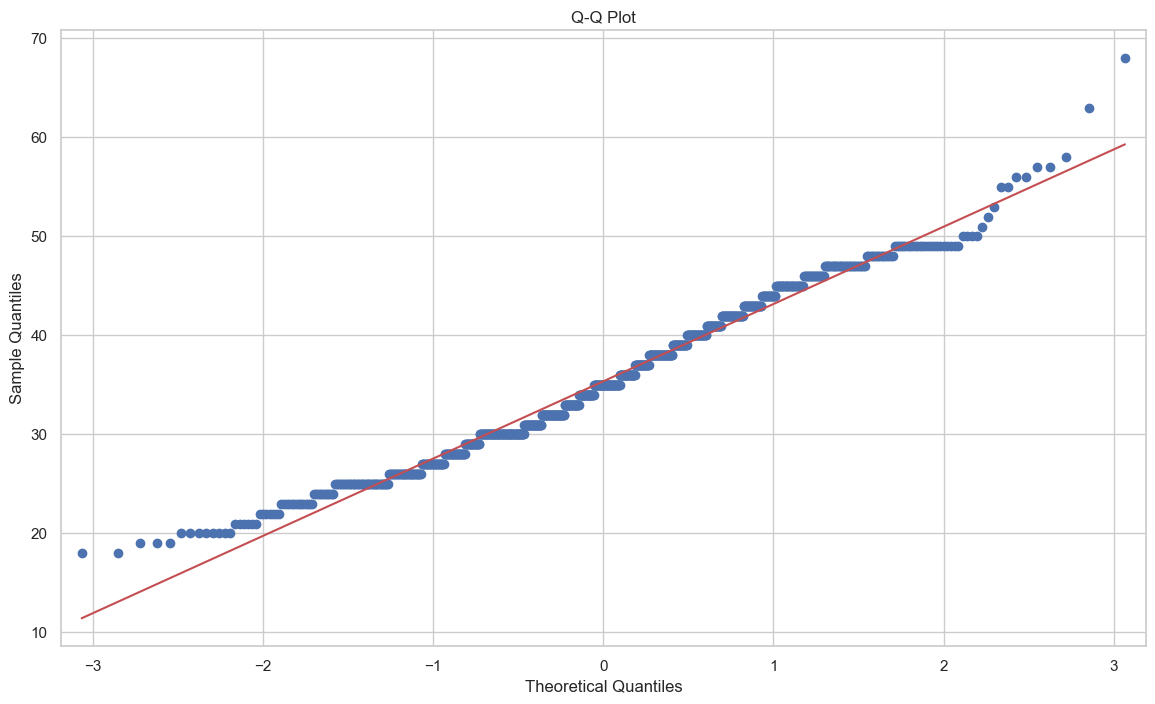

In [52]:
statistic, p_value = stats.shapiro(df['Age_At_First_Sexual_Intercourse'])
alpha = 0.05
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)


k2, p_value = stats.normaltest(df['Age_At_First_Sexual_Intercourse'])
print("\nD'Agostino and Pearson's Test:")
print("Statistic:", k2)
print("p-value:", p_value)
print("Is the data normally distributed (p-value < alpha)?", p_value > alpha)

sm.qqplot(df['Age'], line='s')
plt.title("Q-Q Plot")
plt.show()


In [53]:
from scipy.stats import mannwhitneyu
statistic, p_value = mannwhitneyu(df['Age_At_First_Sexual_Intercourse'], df['HPV_STATUS'], alternative='two-sided')
alpha = 0.05
print("Mann-Whitney U Test:")
print("Statistic:", statistic)
print("p-value:", p_value)
print("Are the distributions significantly different (p-value < alpha)?", p_value < alpha)

Mann-Whitney U Test:
Statistic: 851929.0
p-value: 0.0
Are the distributions significantly different (p-value < alpha)? True


Age_At_First_Sexual_Intercourse is statistically significant and has an effect on HPV

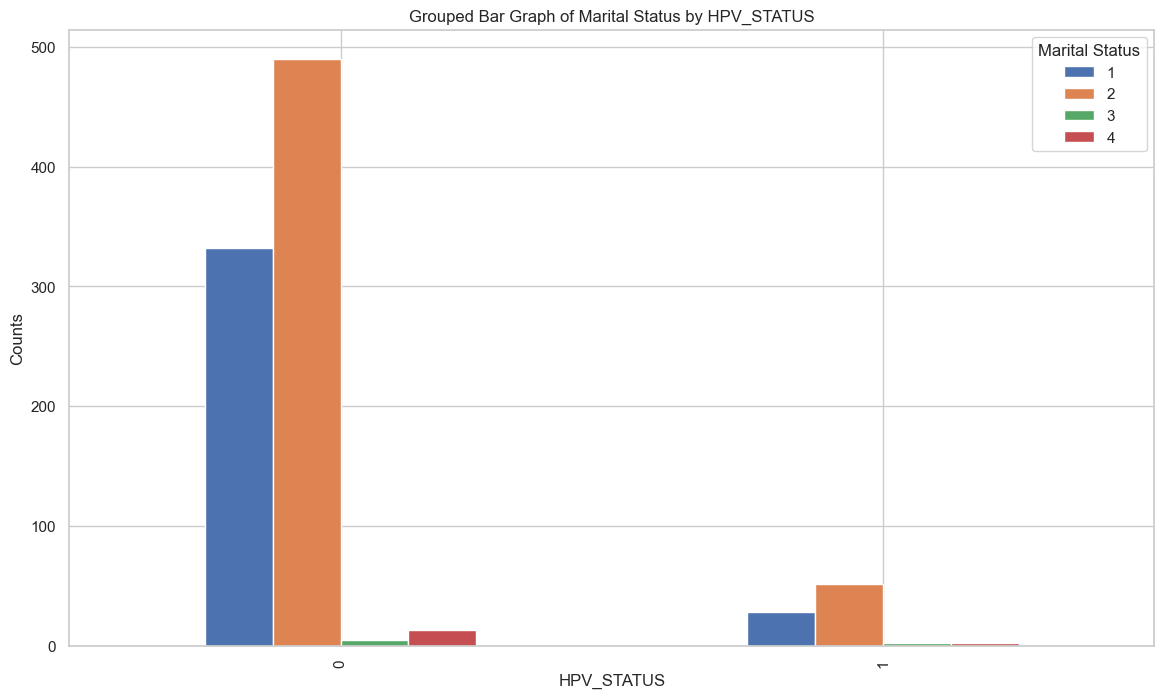

In [54]:
import matplotlib.pyplot as plt

counts = df['Marital_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Marital_Status'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Marital_Status'].unique()]))

grouped_counts = grouped_counts.unstack()


grouped_counts.plot(kind='bar')
plt.xlabel('HPV_STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Marital Status by HPV_STATUS')
plt.legend(title='Marital Status')


plt.show()

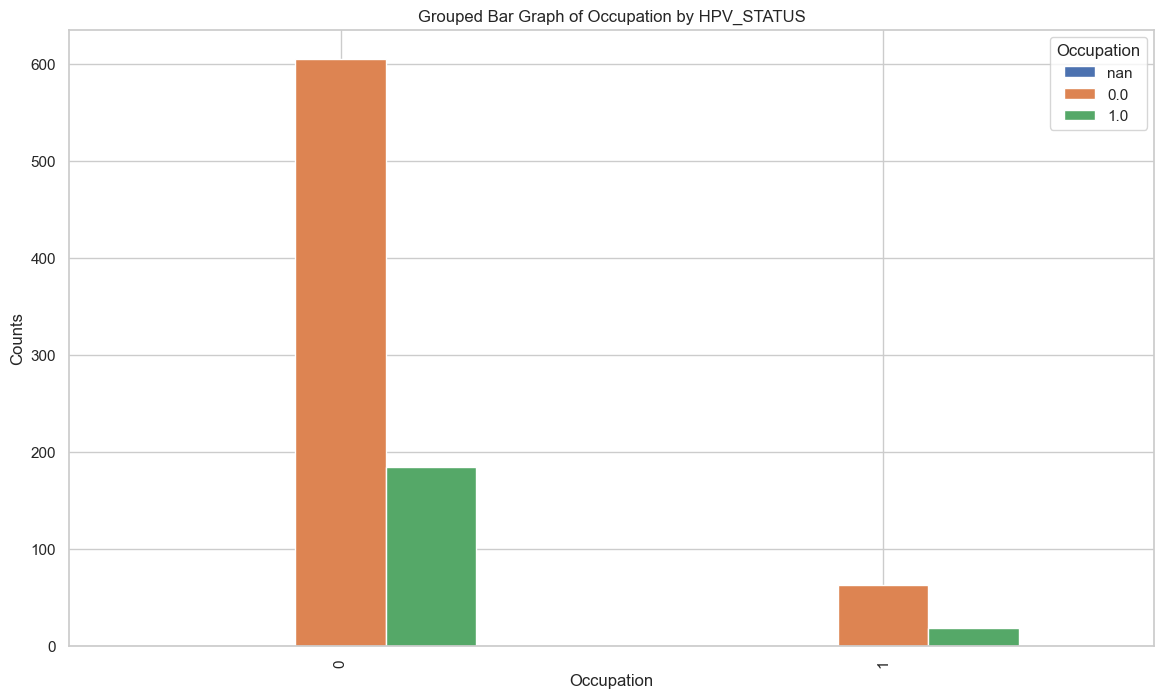

In [55]:
counts = df['Occupation'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Occupation'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Occupation'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Occupation by HPV_STATUS')
plt.legend(title='Occupation')

plt.show()

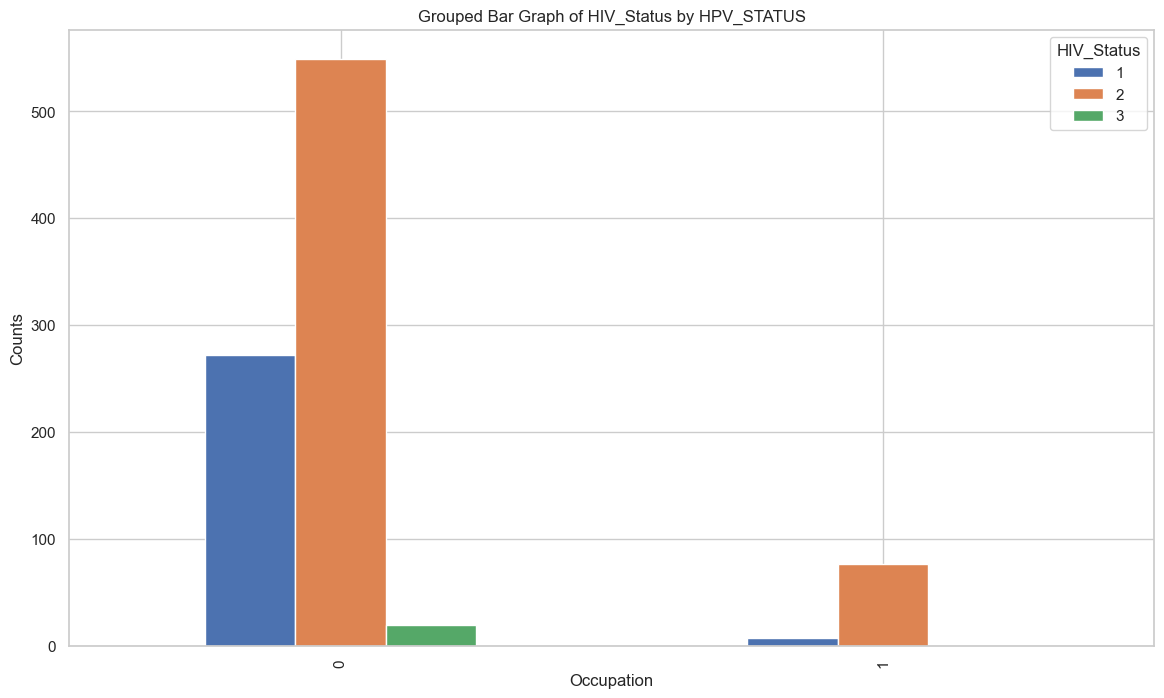

In [56]:
counts = df['HIV_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['HIV_Status'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['HIV_Status'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of HIV_Status by HPV_STATUS')
plt.legend(title='HIV_Status')

plt.show()

In [57]:
df = df.drop(df[df['HIV_Status'] ==3].index)

drop HIV = 3 that is NA

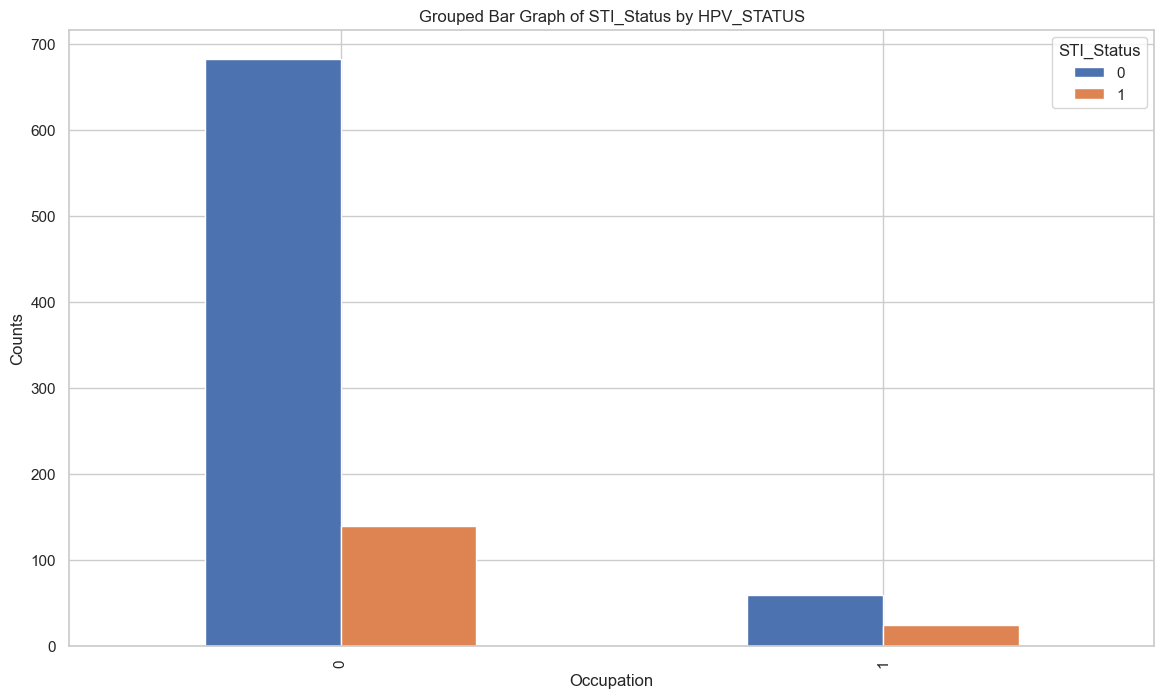

In [58]:
counts = df['STI_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['STI_Status'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['STI_Status'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of STI_Status by HPV_STATUS')
plt.legend(title='STI_Status')

# Show the graph
plt.show()

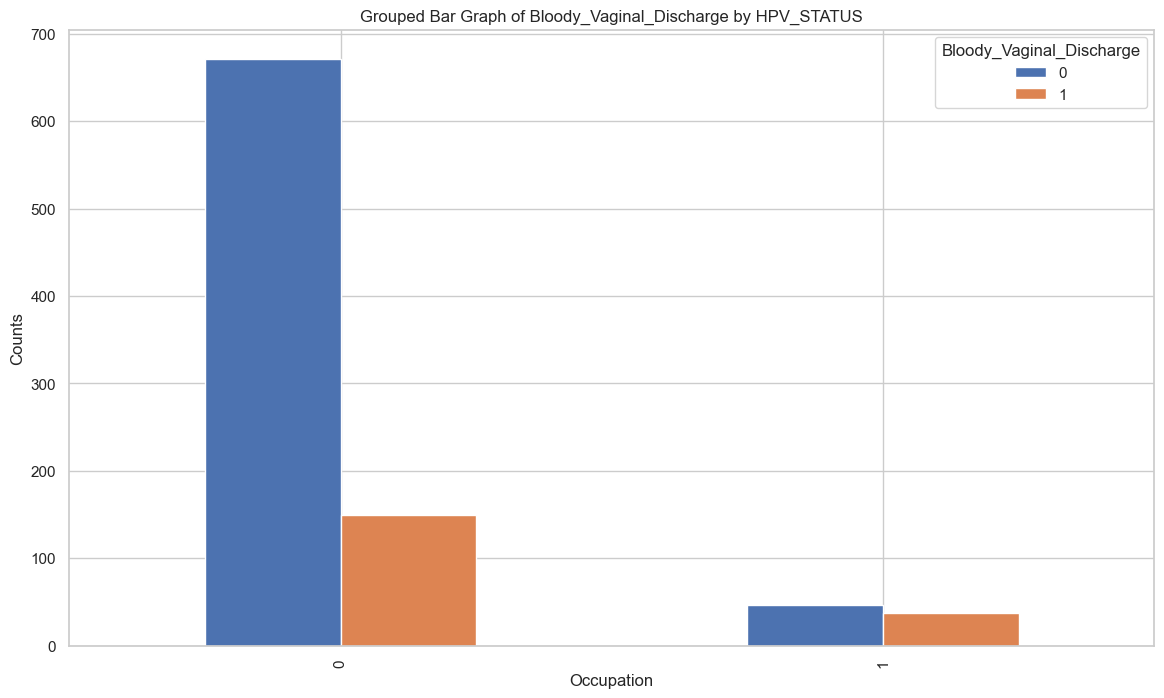

In [59]:
counts = df['STI_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Bloody_Vaginal_Discharge'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Bloody_Vaginal_Discharge'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Bloody_Vaginal_Discharge by HPV_STATUS')
plt.legend(title='Bloody_Vaginal_Discharge')


plt.show()

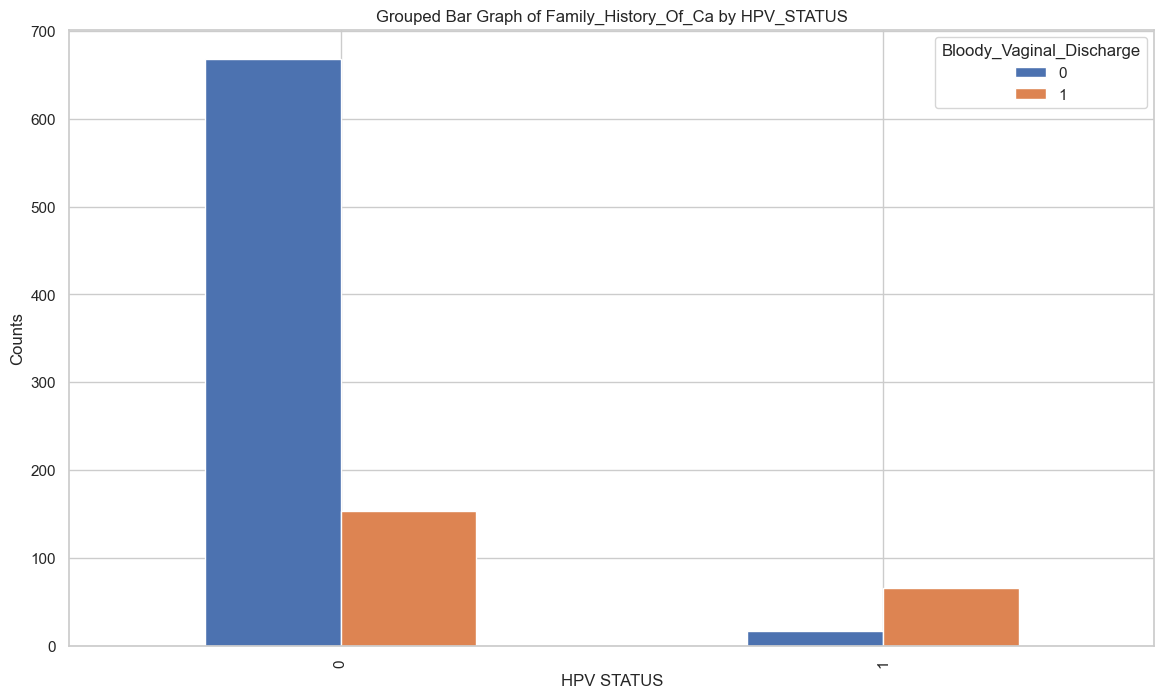

In [60]:
counts = df['STI_Status'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Family_History_Of_Ca'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Family_History_Of_Ca'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('HPV STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Family_History_Of_Ca by HPV_STATUS')
plt.legend(title='Bloody_Vaginal_Discharge')


plt.show()

In [61]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


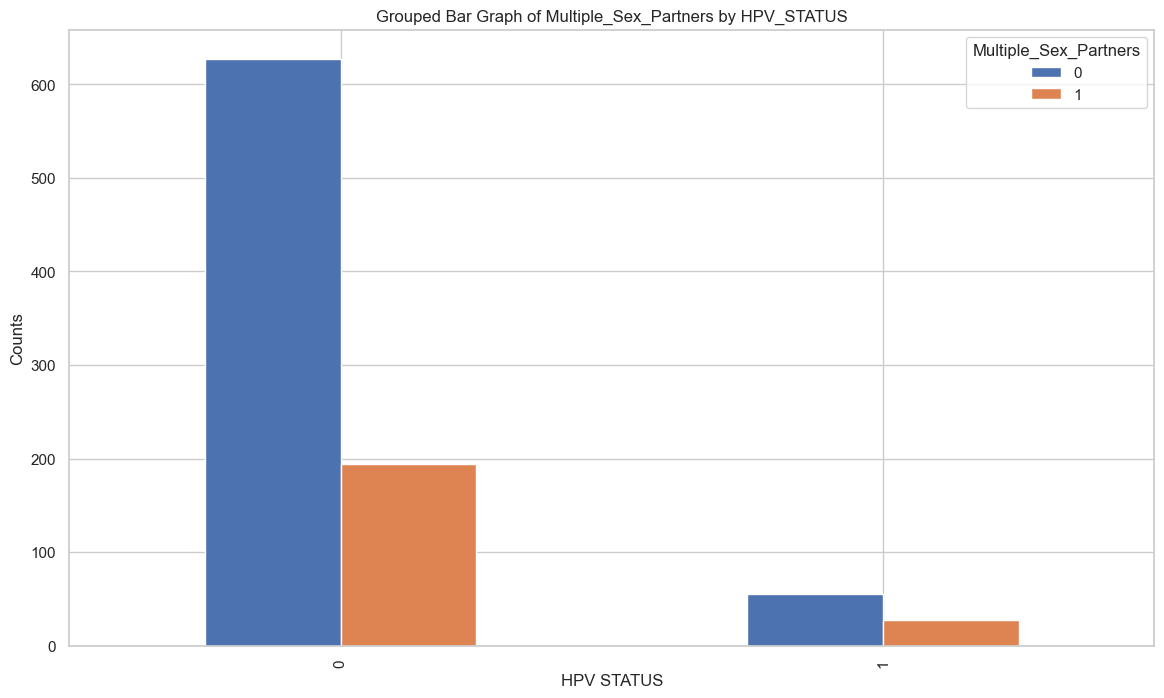

In [62]:

counts = df['Multiple_Sex_Partners'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Multiple_Sex_Partners'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Multiple_Sex_Partners'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('HPV STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Multiple_Sex_Partners by HPV_STATUS')
plt.legend(title='Multiple_Sex_Partners')


plt.show()

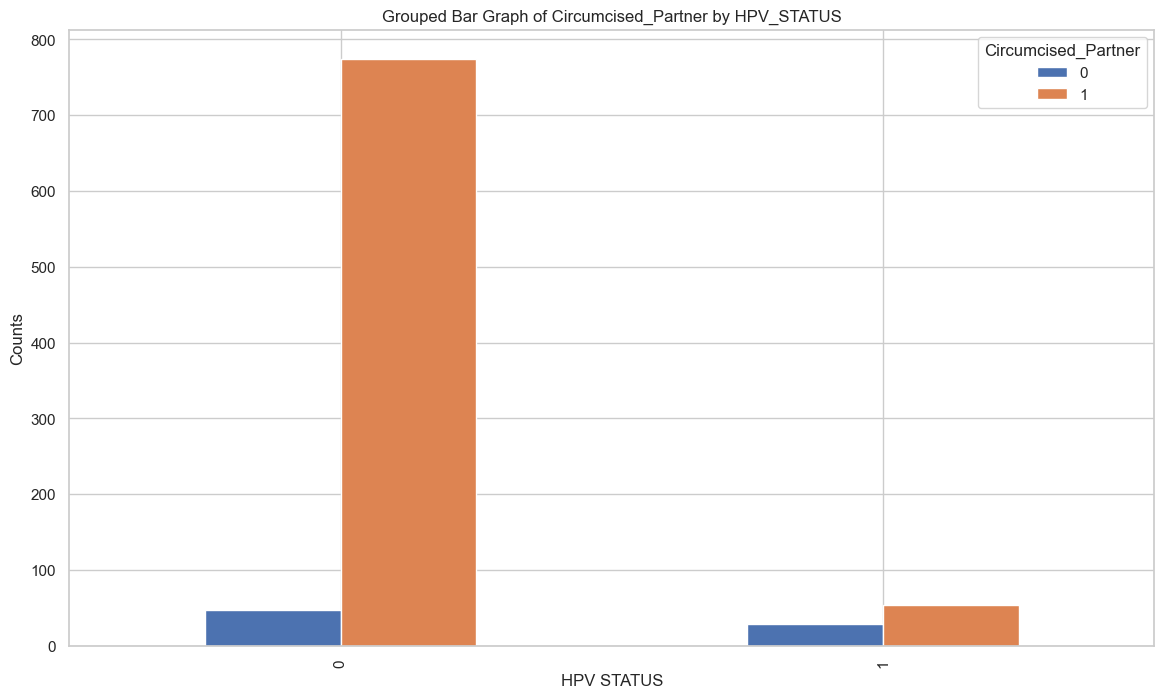

In [63]:
counts = df['Circumcised_Partner'].value_counts()
grouped_counts = df.groupby('HPV_STATUS')['Circumcised_Partner'].value_counts()


grouped_counts = grouped_counts.reindex(pd.MultiIndex.from_product([df['HPV_STATUS'].unique(), df['Circumcised_Partner'].unique()]))
grouped_counts = grouped_counts.unstack()

grouped_counts.plot(kind='bar')
plt.xlabel('HPV STATUS')
plt.ylabel('Counts')
plt.title('Grouped Bar Graph of Circumcised_Partner by HPV_STATUS')
plt.legend(title='Circumcised_Partner')


plt.show()


In [260]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_columns = [col for col in df.columns if col != 'HPV_STATUS']

alpha = 0.05
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['HPV_STATUS'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for '{col}' against 'HPV_STATUS':")
    print("Chi2 statistic:", chi2)
    print("p-value:", p_value)
    print("Are the variables associated (p-value < alpha)?", p_value < alpha)
    print("----------------------------------------------------")


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

Marital status, Occupation, Multiple Sex Partners, smoking not statistically significant

In [65]:
cols_to_drop = ['Marital_Status','Occupation','Multiple_Sex_Partners','Smoking']

In [66]:
df=df.drop(cols_to_drop, axis=1)

In [67]:
df

,Age,HIV_Status,STI_Status,Bloody_Vaginal_Discharge,Family_History_Of_Ca,Bleeding_History,History_Of_STIs,Use_of_IUDs,Age_At_First_Sexual_Intercourse,Circumcised_Partner,HPV_STATUS
0,28,1,0,0,0,0,1,0,24,1,0
1,32,1,0,0,0,0,0,0,22,0,0
2,30,2,0,1,1,1,1,0,16,1,0
4,36,1,1,1,0,1,0,0,17,1,0
5,36,2,0,1,0,1,0,0,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...
924,40,2,1,0,0,0,0,0,15,1,0
925,43,2,0,0,0,0,0,0,16,1,0
926,31,2,1,0,0,0,0,1,16,1,0
927,35,2,0,0,0,0,0,0,18,1,0


In [258]:
df_new

,Age,HIV_Status,STI_Status,Bloody_Vaginal_Discharge,Family_History_Of_Ca,Bleeding_History,History_Of_STIs,Use_of_IUDs,Age_At_First_Sexual_Intercourse,Circumcised_Partner,HPV_STATUS
0,28,1,0,0,0,0,1,0,24,1,0
1,32,1,0,0,0,0,0,0,22,0,0
2,30,2,0,1,1,1,1,0,16,1,0
4,36,1,1,1,0,1,0,0,17,1,0
5,36,2,0,1,0,1,0,0,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...
924,40,2,1,0,0,0,0,0,15,1,0
925,43,2,0,0,0,0,0,0,16,1,0
926,31,2,1,0,0,0,0,1,16,1,0
927,35,2,0,0,0,0,0,0,18,1,0


In [103]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df_new.drop(columns=['HPV_STATUS'])
y = df_new['HPV_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
smote=SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# USING RANDOM FOREST CLASSIFIER

In [105]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

param_grid = {
    'base_estimator__n_estimators': [100, 200, 300],
    'base_estimator__max_depth': [None, 10, 20],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
    'base_estimator__class_weight': [
        {0: 0.4, 1: 0.6},
        {0: 0.3, 1: 0.7},     
    ],
    'n_estimators': [10, 20],  
}

base_estimator = RandomForestClassifier(random_state=42)

bagging_classifier = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

stratified_kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(bagging_classifier, param_grid, cv=stratified_kfolds, scoring='recall', verbose=1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

report_train = classification_report(y_train_resampled, grid_search.predict(X_train_resampled))
report_test = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Parameters: {}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       657
           1       0.98      0.98      0.98       657

    accuracy                           0.98      1314
   macro avg       0.98      0.98      0.98      1314
weighted avg       0.98      0.98      0.98      1314

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       164
           1       0.45      0.82      0.58        17

    accuracy                           0.89       181
   macro avg       0.72      0.86      0.76       181
weighted avg       0.93      0.89      0.90       181



# Using Random Forest with Bagging

In [106]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

param_dist = {
    'base_estimator__n_estimators': [100, 200, 300],
    'base_estimator__max_depth': [None, 10, 20],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
    'base_estimator__class_weight': [
        {0: 0.4, 1: 0.6},
        {0: 0.3, 1: 0.7},
    ],
    'n_estimators': [10, 20],  
}

base_estimator = RandomForestClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_estimator, random_state=42)

stratified_kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    bagging_classifier, param_distributions=param_dist, n_iter=10,
    cv=stratified_kfolds, scoring='recall', verbose=1, random_state=42
)

random_search.fit(X_train_resampled, y_train_resampled)

best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

report_train = classification_report(y_train_resampled, random_search.predict(X_train_resampled))
report_test = classification_report(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 20, 'base_estimator__n_estimators': 100, 'base_estimator__min_samples_split': 5, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_features': 'sqrt', 'base_estimator__max_depth': 20, 'base_estimator__class_weight': {0: 0.3, 1: 0.7}}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       657
           1       0.93      0.98      0.95       657

    accuracy                           0.95      1314
   macro avg       0.95      0.95      0.95      1314
weighted avg       0.95      0.95      0.95      1314

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       164
           1       0.44      0.88      0.59        17

    accuracy                           0.88       181
   macro avg       0.71      0.8

# Using Decision Trees

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

param_grid = {
    'base_estimator__max_depth': [None, 10, 20],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
    'base_estimator__max_features': ['auto', 'sqrt', 'log2'],
    'base_estimator__class_weight': [
        {0: 0.4, 1: 0.6},
        {0: 0.3, 1: 0.7},     
    ],
    'n_estimators': [10, 20], 
}

base_estimator = DecisionTreeClassifier(random_state=42)

bagging_classifier = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

stratified_kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(bagging_classifier, param_grid, cv=stratified_kfolds, scoring='recall', verbose=1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

report_train = classification_report(y_train_resampled, grid_search.predict(X_train_resampled))
report_test = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best Parameters: {'base_estimator__class_weight': {0: 0.3, 1: 0.7}, 'base_estimator__max_depth': 10, 'base_estimator__max_features': 'sqrt', 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 5, 'n_estimators': 20}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       657
           1       0.93      0.98      0.96       657

    accuracy                           0.96      1314
   macro avg       0.96      0.96      0.96      1314
weighted avg       0.96      0.96      0.96      1314

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       164
           1       0.44      0.88      0.59        17

    accuracy                           0.88       181
   macro avg       0.71      0.88      0.76       181
weighted avg 

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2'],
}

boosting_classifier = GradientBoostingClassifier(random_state=42)

stratified_kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(boosting_classifier, param_grid, cv=stratified_kfolds, scoring='recall', verbose=1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

report_train = classification_report(y_train_resampled, grid_search.predict(X_train_resampled))
report_test = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 10 folds for each of 1458 candidates, totalling 14580 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       657
           1       0.99      0.99      0.99       657

    accuracy                           0.99      1314
   macro avg       0.99      0.99      0.99      1314
weighted avg       0.99      0.99      0.99      1314

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       164
           1       0.48      0.71      0.57        17

    accuracy                           0.90       181
   macro avg       0.72      0.81      0.76       181
weighted avg       0.92      0.90      0.91       181



# USING ADABOOST 

In [115]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 201),  
    'learning_rate': uniform(0.01, 0.2),  
    'base_estimator__max_depth': [3, 4, 5],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4],
}

base_estimator = DecisionTreeClassifier(random_state=42)
boosting_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

stratified_kfolds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    boosting_classifier, param_distributions=param_dist,
    n_iter=100, cv=stratified_kfolds, scoring='recall', verbose=1, random_state=42
)

random_search.fit(X_train, y_train)

best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)

report_train = classification_report(y_train, random_search.predict(X_train))
report_test = classification_report(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 4, 'base_estimator__min_samples_split': 5, 'learning_rate': 0.021282315805420053, 'n_estimators': 137}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       657
           1       0.86      0.73      0.79        66

    accuracy                           0.96       723
   macro avg       0.92      0.86      0.88       723
weighted avg       0.96      0.96      0.96       723

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       164
           1       0.75      0.71      0.73        17

    accuracy                           0.95       181
   macro avg       0.86      0.84      0.85       181
weighted avg       0.95      0.95      0.95       181



# USING SVM

In [118]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'class_weight': [None, 'balanced']
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=stratified_kfold, scoring='recall', verbose=1)

grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

predictions = cross_val_predict(best_estimator, X_train, y_train, cv=stratified_kfold)


report_train = classification_report(y_train, predictions)

y_pred = best_estimator.predict(X_test)

report_test = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       655
           1       0.44      0.85      0.58        68

    accuracy                           0.89       723
   macro avg       0.71      0.87      0.76       723
weighted avg       0.93      0.89      0.90       723

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       166
           1       0.42      1.00      0.59        15

    accuracy                           0.88       181
   macro avg       0.71      0.94      0.76       181
weighted avg       0.95      0.88      0.90       181



# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

kfolds = 5
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=kfolds, scoring='f1_macro', verbose=1)

grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_

predictions = cross_val_predict(best_estimator, X_train_resampled, y_train_resampled, cv=kfolds)

report_train = classification_report(y_train_resampled, predictions)

y_pred = best_estimator.predict(X_test)

report_test = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report for Training Data:\n", report_train)
print("Classification Report for Testing Data:\n", report_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       657
           1       0.88      0.88      0.88       657

    accuracy                           0.88      1314
   macro avg       0.88      0.88      0.88      1314
weighted avg       0.88      0.88      0.88      1314

Classification Report for Testing Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       166
           1       0.85      0.73      0.79        15

    accuracy                           0.97       181
   macro avg       0.91      0.86      0.88       181
weighted avg       0.97      0.97      0.97       181



In [122]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

log_reg = LogisticRegression(solver='liblinear', random_state=42)


stratified_kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(log_reg, param_grid, cv=stratified_kfolds, scoring='recall', verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)


print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 10, 'penalty': 'l2'}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       166
           1       0.36      0.87      0.51        15

    accuracy                           0.86       181
   macro avg       0.67      0.86      0.71       181
weighted avg       0.93      0.86      0.89       181



# USING  TRADITIONAL SVM

In [127]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
}

# Create SVM model with class weights
svm = SVC(class_weight='balanced')

# Create stratified k-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=stratified_kfold, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best SVM estimator
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters:", best_params)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 10, 'kernel': 'linear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91       166
           1       0.34      0.93      0.50        15

    accuracy                           0.85       181
   macro avg       0.67      0.89      0.70       181
weighted avg       0.94      0.85      0.87       181



In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
}

svm = SVC(class_weight='balanced')

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=stratified_kfold, scoring='precision', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best SVM estimator
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters:", best_params)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 1, 'kernel': 'linear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       166
           1       0.36      0.87      0.51        15

    accuracy                           0.86       181
   macro avg       0.67      0.86      0.71       181
weighted avg       0.93      0.86      0.89       181



# NOW USING ONE CLASS SVM

In [138]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import OneClassSVM
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'kernel': ['rbf', 'poly'],
    'gamma': [0.01, 0.1, 1.0],
    'nu': [0.01, 0.05, 0.1],
}
OneSVM = OneClassSVM()

grid_search = GridSearchCV(OneSVM, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_svm.predict(X_test)

class_report = classification_report(y_test, y_pred)


print("Best Hyperparameters:", best_params)

print("\nClassification Report:\n", class_report)



Best Hyperparameters: {'gamma': 0.01, 'kernel': 'poly', 'nu': 0.01}

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       166
           1       0.09      1.00      0.16        15

    accuracy                           0.08       181
   macro avg       0.03      0.33      0.05       181
weighted avg       0.01      0.08      0.01       181



In [144]:
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

one_class_svm = OneClassSVM()


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search = GridSearchCV(one_class_svm, param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

best_one_class_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_one_class_svm.predict(X_scaled)

print("Best Hyperparameters:", best_params)
print("\nClassification Report:\n", classification_report(y, y_pred))


Best Hyperparameters: {'kernel': 'linear', 'nu': 0.05}

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       821
           1       0.10      1.00      0.18        83

    accuracy                           0.09       904
   macro avg       0.03      0.33      0.06       904
weighted avg       0.01      0.09      0.02       904

